### Hayvanat bahçesi işletmecileri ziyaretçi sayılarını tahmin etmek için bir makine öğrenimi modeli oluşturmak istiyorlar. Veri seti, hayvanların türleri, yaşları, cinsiyetleri, doğum tarihleri, doğum yerleri, yerli/ithal edilme durumları, beslenme alışkanlıkları, yaşam alanları ve özellikleri gibi özellikleri içeriyor. Ayrıca, her hayvan için günlük ziyaretçi sayılarının yanı sıra özel etkinlikler veya tatiller gibi faktörlere göre ziyaretçi sayıları da veri setine dahil edilmiştir.
#### Veri seti, 1000 hayvanın bilgilerini ve 1 yıl boyunca günlük ziyaretçi sayılarını içerir. Ancak, eksik ve aykırı verilerin de yer aldığı gerçekçi bir veri seti oluşturmak için bazı verileri rastgele oluşturacağız.

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns

In [81]:
animal_data = pd.DataFrame({
    'ID': range(1000),
    'Species': np.random.choice(['Tiger', 'Lion', 'Bear', 'Giraffe', 'Elephant'], size=1000),
    'Age': np.random.normal(loc=10, scale=3, size=1000).astype(int),
    'Sex': np.random.choice(['Male', 'Female'], size=1000),
    'Birthplace': np.random.choice(['Local', 'Imported'], size=1000),
    'Diet': np.random.choice(['Carnivore', 'Herbivore'], size=1000),
    'Habitat': np.random.choice(['Savannah', 'Rainforest', 'Arctic', 'Desert'], size=1000),
    'Features': np.random.choice(['Striped', 'Spotted', 'Hairy', 'Trunk'], size=1000)
})

visitor_data = pd.DataFrame({
    'ID': np.random.choice(range(1000), size=365),
    'Date': pd.date_range(start='2022-01-01', end='2022-12-31', freq='D'),
    'Visitors': np.random.normal(loc=100, scale=50, size=365).astype(int)
})


zoo_data = animal_data.merge(visitor_data)

zoo_data['Age'] = np.where(np.random.random() < 0.05, np.nan, zoo_data['Age'])
zoo_data['Age'] = zoo_data['Age'] + np.random.randint(0, 50, size=zoo_data.shape[0])

zoo_data['Visitors'] = zoo_data['Visitors'] + np.random.randint(-50, 50, size=zoo_data.shape[0])
zoo_data['Visitors'] = np.where(zoo_data['Visitors'] < 0, 0, zoo_data['Visitors'])

zoo_data.head()

,ID,Species,Age,Sex,Birthplace,Diet,Habitat,Features,Date,Visitors
0,3,Lion,14.0,Male,Imported,Herbivore,Arctic,Hairy,2022-02-25,161
1,10,Lion,30.0,Female,Imported,Herbivore,Rainforest,Spotted,2022-07-25,169
2,16,Tiger,30.0,Female,Local,Carnivore,Arctic,Trunk,2022-07-14,111
3,23,Giraffe,30.0,Male,Local,Carnivore,Arctic,Trunk,2022-05-26,1
4,25,Bear,52.0,Female,Local,Carnivore,Savannah,Spotted,2022-03-10,97


# Hipotez Testleri

# --------------------------------------------------------

### H0: Erkekler, hayvanat bahçesini kadınlardan daha fazla ziyaret etmiştir
### H1: Erkekler, hayvanat bahçesini kadınlardan daha fazla ziyaret etmemiştir.

In [82]:
male_visitor = zoo_data.loc[zoo_data['Sex'] == 'Male', 'Visitors']
female_visitor = zoo_data.loc[zoo_data['Sex'] == 'Female', 'Visitors']

#### Hangi hipotez testini kullanacağımıza varsayımlar üzerinden karar verelim. normallik varsayımı, homojenlik gibi varsayım çeşitlerini inceledikten sonra ortaya çıkan tabloya göre en uygun testi bulalım. Daha sonra hipotez testimizi gerçekleştirelim.

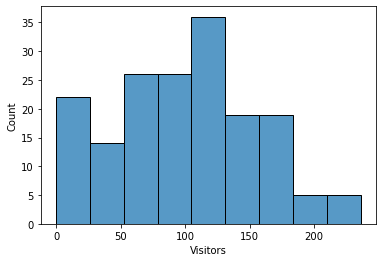

In [83]:
# Normal Dağılım: İki örneklem 'de normal dağılıyor mu ?
## Histogram grafiği ile bunu anlayabiliriz.

sns.histplot(male_visitor);

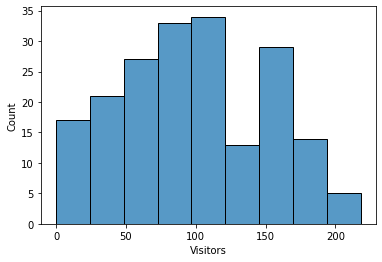

In [84]:
sns.histplot(female_visitor);

#### İki örneklem de normal dağılmıyor. Şimdi ise varyans homojenliği varsayımını inceleyelim. Bu varsayıma göre iki örneklemin de varyansı birbirine eşit olmalıdır.

In [85]:
male_visitor.var()

3140.382700938392

In [86]:
female_visitor.var()

2822.424816493955

#### Varyans homojen değildir sonucuna ulaştık. Bir diğer varsayım ise bağımsız örneklem varsayımıdır. Bu varsayım, iki örneklemin de birbirinden farklı olması gerektiğini varsayar. Örneklemler birbirinden farklı olduğu için bağımsız örneklem varsayımı tutuyor.

### Yukarıda incelediğimiz varsayımların bazıları sağlanmadığı için T-testi, Z-testi gibi parametrik hipotez testlerini uygulayamayız. Varsayımlar sağlanmadığı için Non-parametrik hipotez testi yapabiliriz. Bizim durumumuza uygun olan test ise Man Whitney U testi gibi gözüküyor.

In [87]:
from scipy.stats import mannwhitneyu

In [88]:
stat, p_value = mannwhitneyu(male_visitor, female_visitor, method='auto')
print('Test İstatistiği: ', stat)
print('P-Value Değeri: ', p_value)

Test İstatistiği:  16961.5
P-Value Değeri:  0.7182570138876019


### P-Value değeri, alfa değerinden (0.05) büyük olduğu için H0 hipotezini reddedemeyiz. Yani erkekler, hayvanat bahçesini kadınlardan daha fazla ziyaret etmiştir sonucuna ulaşıyoruz. Şimdi ise hipotez testimizin sonucunu basit bir yöntem ile test edelim.

In [89]:
zoo_data.groupby('Sex')['Visitors'].count()

Sex
Female    193
Male      172
Name: Visitors, dtype: int64

### Görüldüğü üzere hipotez testimizde ulaştığımız sonucun sağlamasını yapmış olduk. Erkekler, hayvanat bahçesini kadınlardan daha fazla ziyaret ediyorlar.

# -------------------------------------------------

# Veri Analizi

In [90]:
zoo_data.head()

,ID,Species,Age,Sex,Birthplace,Diet,Habitat,Features,Date,Visitors
0,3,Lion,14.0,Male,Imported,Herbivore,Arctic,Hairy,2022-02-25,161
1,10,Lion,30.0,Female,Imported,Herbivore,Rainforest,Spotted,2022-07-25,169
2,16,Tiger,30.0,Female,Local,Carnivore,Arctic,Trunk,2022-07-14,111
3,23,Giraffe,30.0,Male,Local,Carnivore,Arctic,Trunk,2022-05-26,1
4,25,Bear,52.0,Female,Local,Carnivore,Savannah,Spotted,2022-03-10,97


In [91]:
zoo_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,365.0,520.243836,287.192049,3.0,267.0,528.0,768.0,999.0
Age,365.0,33.994521,15.022327,4.0,20.0,33.0,48.0,62.0
Visitors,365.0,98.315068,54.448907,0.0,57.0,98.0,140.0,236.0


In [92]:
zoo_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          365 non-null    int64         
 1   Species     365 non-null    object        
 2   Age         365 non-null    float64       
 3   Sex         365 non-null    object        
 4   Birthplace  365 non-null    object        
 5   Diet        365 non-null    object        
 6   Habitat     365 non-null    object        
 7   Features    365 non-null    object        
 8   Date        365 non-null    datetime64[ns]
 9   Visitors    365 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(6)
memory usage: 29.9+ KB


In [93]:
zoo_data.isnull().sum()

ID            0
Species       0
Age           0
Sex           0
Birthplace    0
Diet          0
Habitat       0
Features      0
Date          0
Visitors      0
dtype: int64

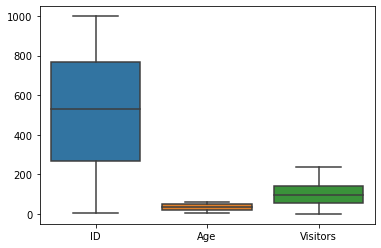

In [94]:
sns.boxplot(data=zoo_data);

# Veri Ön İşleme

### Bu kısımda kategorik değişkenleri numerik değişkenlere çevireceğiz. Visitors değişkeninde ki aykırı gözlemleri işleyeceğiz.

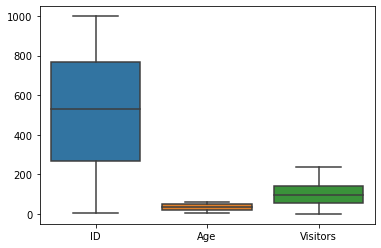

In [95]:
# Aykırı gözlem analizi

visitors = zoo_data['Visitors']

q1, q3 = np.percentile(visitors, [25, 75])
iqr = q3 - q1
alt_sinir = q1 - 1.5 * iqr
ust_sinir = q3 + 1.5 * iqr

zoo_data[zoo_data['Visitors'] < alt_sinir] = alt_sinir
zoo_data[zoo_data['Visitors'] > ust_sinir] = ust_sinir

sns.boxplot(data=zoo_data);

In [96]:
zoo_data.head()

,ID,Species,Age,Sex,Birthplace,Diet,Habitat,Features,Date,Visitors
0,3.0,Lion,14.0,Male,Imported,Herbivore,Arctic,Hairy,2022-02-25 00:00:00,161.0
1,10.0,Lion,30.0,Female,Imported,Herbivore,Rainforest,Spotted,2022-07-25 00:00:00,169.0
2,16.0,Tiger,30.0,Female,Local,Carnivore,Arctic,Trunk,2022-07-14 00:00:00,111.0
3,23.0,Giraffe,30.0,Male,Local,Carnivore,Arctic,Trunk,2022-05-26 00:00:00,1.0
4,25.0,Bear,52.0,Female,Local,Carnivore,Savannah,Spotted,2022-03-10 00:00:00,97.0


In [97]:
# Kategorik değişkenleri nümerik değişkenlere dönüştürme

from sklearn.preprocessing import LabelEncoder, scale

lbe = LabelEncoder()
zoo_data['Species'] = lbe.fit_transform(zoo_data['Species'])
zoo_data['Sex'] = lbe.fit_transform(zoo_data['Sex'])
zoo_data['Birthplace'] = lbe.fit_transform(zoo_data['Birthplace'])
zoo_data['Diet'] = lbe.fit_transform(zoo_data['Diet'])
zoo_data['Habitat'] = lbe.fit_transform(zoo_data['Habitat'])
zoo_data['Features'] = lbe.fit_transform(zoo_data['Features'])

In [98]:
zoo_data.Species.unique()
# 0: Tiger   # 1: Bear   # 2: Giraffe   # 3: Lion   # 4: Elephant

array([3, 4, 2, 0, 1])

In [99]:
zoo_data.Sex.unique()
# 1: female   # 0: male

array([1, 0])

In [100]:
zoo_data.Birthplace.unique()
# 1: Local    # 0: Imported

array([0, 1])

In [101]:
zoo_data.Diet.unique()
# 0: Herbivore   # 1: Carnivore

array([1, 0])

In [102]:
zoo_data.Habitat.unique()
# 0: Desert   # 1: Arctic   # 2: Rainforest   # 3: Savannah

array([0, 2, 3, 1])

In [103]:
zoo_data.Features.unique()
# 0: Hairy   # 1: Striped   # 2: Spotted    # 3: Trunk

array([0, 1, 3, 2])

# Model İşlemleri

In [104]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

In [105]:
# Bağımlı ve bağımsız değişkenlerimizi oluşturalım.

X = zoo_data.drop(['ID', 'Visitors', 'Date'], axis=1)
y = zoo_data['Visitors']

In [117]:
X

,Species,Age,Sex,Birthplace,Diet,Habitat,Features
0,3,14.0,1,0,1,0,0
1,3,30.0,0,0,1,2,1
2,4,30.0,0,1,0,0,3
3,2,30.0,1,1,0,0,3
4,0,52.0,0,1,0,3,1
...,...,...,...,...,...,...,...
360,4,19.0,1,0,0,0,1
361,3,23.0,1,1,0,1,0
362,4,32.0,0,1,0,0,2
363,4,11.0,0,1,0,0,2


In [106]:
# eğitim ve test setlerini ayıralım.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
# Modellerimizi oluşturalım ve seçelim.

models = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}:  r2: {r2}, mse: {mse}')

LinearRegression:  r2: -0.057812771720189726, mse: 2522.75661830061
Lasso:  r2: -0.049976605028753784, mse: 2504.0683003757104
Ridge:  r2: -0.05764242879751036, mse: 2522.350370855828
ElasticNet:  r2: -0.045887867828748874, mse: 2494.317152433877


In [108]:
# en iyi random_state değerini bulalım.
randoms = [0, 10, 20, 42, 60, 80, 100]

for element in randoms:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=element)
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        print(f'random_state={element} değeri, {name} modeli için R-Kare değeri: {r2}')

random_state=0 değeri, LinearRegression modeli için R-Kare değeri: 0.01208497303759537
random_state=0 değeri, Lasso modeli için R-Kare değeri: 0.005478771161060325
random_state=0 değeri, Ridge modeli için R-Kare değeri: 0.01204597848773803
random_state=0 değeri, ElasticNet modeli için R-Kare değeri: 0.0062232056588251705
random_state=10 değeri, LinearRegression modeli için R-Kare değeri: 0.009277548667309343
random_state=10 değeri, Lasso modeli için R-Kare değeri: -0.0016790725688924368
random_state=10 değeri, Ridge modeli için R-Kare değeri: 0.009152410992077753
random_state=10 değeri, ElasticNet modeli için R-Kare değeri: 0.0013344021062106082
random_state=20 değeri, LinearRegression modeli için R-Kare değeri: -0.04469729279995449
random_state=20 değeri, Lasso modeli için R-Kare değeri: -0.024676381538627945
random_state=20 değeri, Ridge modeli için R-Kare değeri: -0.04438162598055162
random_state=20 değeri, ElasticNet modeli için R-Kare değeri: -0.026394765706334367
random_state=42 

### En iyi değer için model ve random_state değeri: ElasticNet,  10
### Şimdi ise bulduğumuz değerleri kullanarak modelimizi tekrar oluşturalım.

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
model = ElasticNet().fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('R-Kare Değeri: ', r2)
print('MSE Değeri: ', mse)

R-Kare Değeri:  0.0013344021062106082
MSE Değeri:  3047.8438234513987


In [110]:
# Modelimizin bulmuş olduğu katsayılar.
model.coef_

array([ 0.32673145, -0.0631154 ,  0.08287532, -1.00792343,  0.6530735 ,
        0.95101967,  1.35746833])

In [111]:
# Fonksiyondaki bağımsız terim.
model.intercept_

96.10733290087992

# Model Tuning

In [112]:
params = {'alpha':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 'fit_intercept':[True, False],
          'selection':['cyclic', 'random'], 'random_state':[0, 10, 20, 42, 60, 80, 100]}
grid = GridSearchCV(estimator=model, param_grid=params, cv=5)
grid_model = grid.fit(X_train, y_train)
grid_pred = grid_model.predict(X_test)

print('En iyi parametreler: ', grid_model.best_params_)
print('En iyi skor: ', grid_model.best_score_)

En iyi parametreler:  {'alpha': 1, 'fit_intercept': True, 'random_state': 10, 'selection': 'random'}
En iyi skor:  -0.034147842478454524


In [113]:
# En iyi hiperparametrelere göre modelimizi tekrar oluşturalım.
model = ElasticNet(alpha=1, fit_intercept=True, random_state=20, selection='random')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R-Kare Değeri: ', r2)

R-Kare Değeri:  0.001334285505799615


# Tahmin

In [114]:
zoo_data.head()
## Species: # 0: Tiger   # 1: Bear   # 2: Giraffe   # 3: Lion   # 4: Elephant
## Sex: # 1: female   # 0: male
## Birthplace: # 1: Local    # 0: Imported
## Diet: # 0: Herbivore   # 1: Carnivore
## Habitat: # 0: Desert   # 1: Arctic   # 2: Rainforest   # 3: Savannah
## Features: # 0: Hairy   # 1: Striped   # 2: Spotted    # 3: Trunk

,ID,Species,Age,Sex,Birthplace,Diet,Habitat,Features,Date,Visitors
0,3.0,3,14.0,1,0,1,0,0,2022-02-25 00:00:00,161.0
1,10.0,3,30.0,0,0,1,2,1,2022-07-25 00:00:00,169.0
2,16.0,4,30.0,0,1,0,0,3,2022-07-14 00:00:00,111.0
3,23.0,2,30.0,1,1,0,0,3,2022-05-26 00:00:00,1.0
4,25.0,0,52.0,0,1,0,3,1,2022-03-10 00:00:00,97.0


In [125]:
species = input('Hayvanın Türünü Giriniz: ')
age = float(input('Hayvanın Yaşını Giriniz: '))
sex = input('Hayvanın Cinsiyetini Giriniz: ')
birthplace = input('Hayvanın Doğum Yerini Giriniz: ')
diet = input('Hayvanın beslenme türünü giriniz: ')
habitat = input('Hayvanın Yaşadığı Alanı Giriniz: ')
features = input('Hayvanın Özelliğini Giriniz: ')

if species.casefold() == 'tiger':
    species = 0
elif species.casefold() == 'bear':
    species = 1
elif species.casefold() == 'giraffe':
    species = 2
elif species.casefold() == 'lion':
    species = 3
elif species.casefold() == 'elephant':
    species = 4

if sex.casefold() == 'female':
    sex = 1
elif sex.casefold() == 'male':
    sex = 0

if birthplace.casefold() == 'local':
    birthplace = 1
elif birthplace.casefold() == 'imported':
    birthplace = 0

if diet.casefold() == 'herbivore':
    diet = 0
elif diet.casefold() == 'carnivore':
    diet= 1
    
## Habitat: # 0: Desert   # 1: Arctic   # 2: Rainforest   # 3: Savannah
if habitat.casefold() == 'desert':
    habitat = 0
elif habitat.casefold() == 'arctic':
    habitat = 1
elif habitat.casefold() == 'rainforest':
    habitat = 2
elif habitat.casefold() == 'savannah':
    habitat = 3
    
## Features: # 0: Hairy   # 1: Striped   # 2: Spotted    # 3: Trunk
if features.casefold() == 'hairy':
    features = 0
elif features.casefold() == 'striped':
    features = 1
elif features.casefold() == 'spotted':
    features = 2
elif features.casefold() == 'trunk':
    features = 3
    
user_pred = model.predict([[species, age, sex, birthplace, diet, habitat, features]])
print('----------------------------------------------------')
print('Tahmini Ziyaretçi Sayısı: ', int(user_pred))
## Species: # 0: Tiger   # 1: Bear   # 2: Giraffe   # 3: Lion   # 4: Elephant
## Sex: # 1: female   # 0: male
## Birthplace: # 1: Local    # 0: Imported
## Diet: # 0: Herbivore   # 1: Carnivore
## Habitat: # 0: Desert   # 1: Arctic   # 2: Rainforest   # 3: Savannah
## Features: # 0: Hairy   # 1: Striped   # 2: Spotted    # 3: Trunk

Hayvanın Türünü Giriniz:  tiger
Hayvanın Yaşını Giriniz:  30
Hayvanın Cinsiyetini Giriniz:  male
Hayvanın Doğum Yerini Giriniz:  local
Hayvanın beslenme türünü giriniz:  carnivore
Hayvanın Yaşadığı Alanı Giriniz:  savannah
Hayvanın Özelliğini Giriniz:  trunk


----------------------------------------------------
Tahmini Ziyaretçi Sayısı:  100


C:\Users\murat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


# Sonuç 

### Üzerinde çalıştığımız veri setini kendimiz oluşturduğumuz için gerçek hayat senaryosu değildir. Amacımız bir veri bilimi projesinde yapılması gereken işlemleri yaparak kendimizi geliştirmektir. Bir gerçek hayat projesinde, R-kare değeri ve ortalama kare hata değeri bu örnekteki gibi aykırı gözüktüğünde, eksik ve aykırı gözlem analizini tekrar gözden geçirmek, Bağımsız değişkenleri seçerken bir inceleme yapmak ve belki de elemek, doğru modeli seçmek, olabildiğince kapsamlı model tuning ve model doğrulama işlemlerini yapmak ve belki de verilerin verimsiz olduğuna karar verip veri seti üzerinde değişiklik-onarma yapmak isteyebiliriz.